# Analysis of Google PlayStore Apps dataset

Using the Visualization methods, we reveal the information hidden in the dataset:
  
  - What types and categories of apps are the most popular across the playstore
  - What types and categories of apps get the highest number of installations
 
Using K-Nearest Neighbor Algorithm, we predict the  ratings of the 20% of apps based on their attributes with 89% accuracy by training the model over the remaining 80% data.

In [1]:
import pandas as pd

In [2]:
#Let us import the dataset.
data = pd.read_csv("googleplaystore.csv")

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams

In [4]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [5]:
import sys
import re
import time
import datetime

In [6]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We take a look at the attributes of the dataset.
The data.info() will give us useful insights. It is used below.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


So there are 13 columns in the dataset with a mojority of them of type 'object'.
There are 10841 apps recorded in the dataset.

In [8]:
data.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Out of the 10841 applications recorded in the dataset, there are 9660 unique applications. We need to remove the remaining duplicate entries for our analysis. It also tells that a mjority of those unique cppas are from 'Family' catagory. A large number of these unique apps see more than a million installations, are 'Free' to download and have content suitable for everyone. We also notice that there are a lot of null entries in various columns. The dataset thus requires cleansing of the 'null' values.
Let us start with removing the duplicate entries.

In [9]:
data = data.drop_duplicates(subset='App')

We summarize the null entries in the columns below:

In [10]:
data.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

'Rating' column has the highest number of null entries. We drop the null entries in all of the columns as they carry no meaning. 

In [11]:
data.dropna(inplace=True, subset =['Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver'])
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

So now all the null entries are removed.

We start our analysis of the 'cleaned' data by studying the individual statistics of the columns in the dataset.

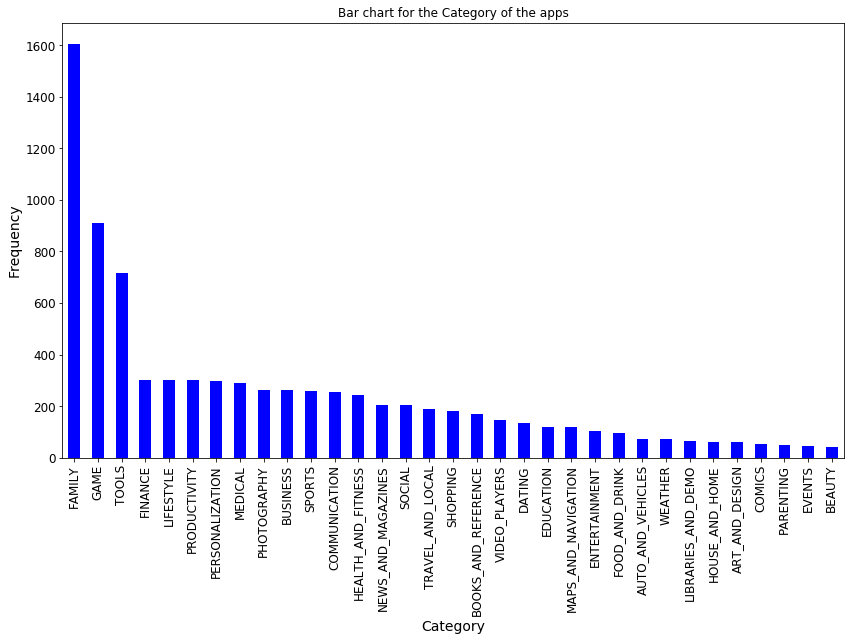

In [12]:
ax = data['Category'].value_counts().plot(kind='bar', color = 'blue',
                                    figsize=(14,8),
                                    title="Bar chart for the Category of the apps")
ax.set_xlabel("Category", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
plt.tick_params(labelsize=12)

As mentioned above, most of the apps in the appstore lie in the category of "Family". There are about 1600 Family apps in the dataset followed by the apps that can be categorized as "Game" and "Tools" which are 900 and 700 in number, respectively.

Next, we look at the frequency of these apps in the appstore with respect to their installations across the android devices.

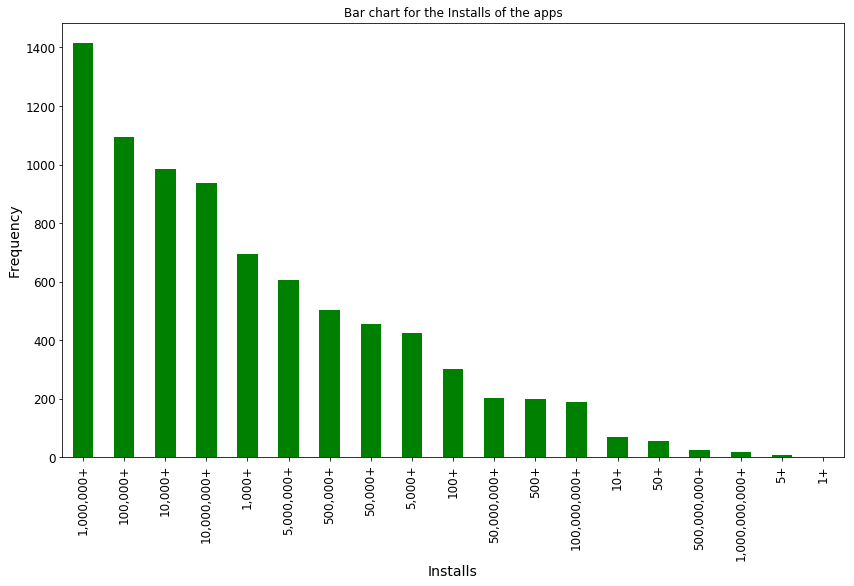

In [13]:
ax = data['Installs'].value_counts().plot(kind='bar', color = 'green',
                                    figsize=(14,8),
                                    title="Bar chart for the Installs of the apps")
ax.set_xlabel("Installs", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
plt.tick_params(labelsize=12)

The figure above shows that the majority of the apps present in the appstore are widely downloaded across the android devices.
About 1400 of the apps see more than a million installations. The number of apps with very little installation are significantly smaller.

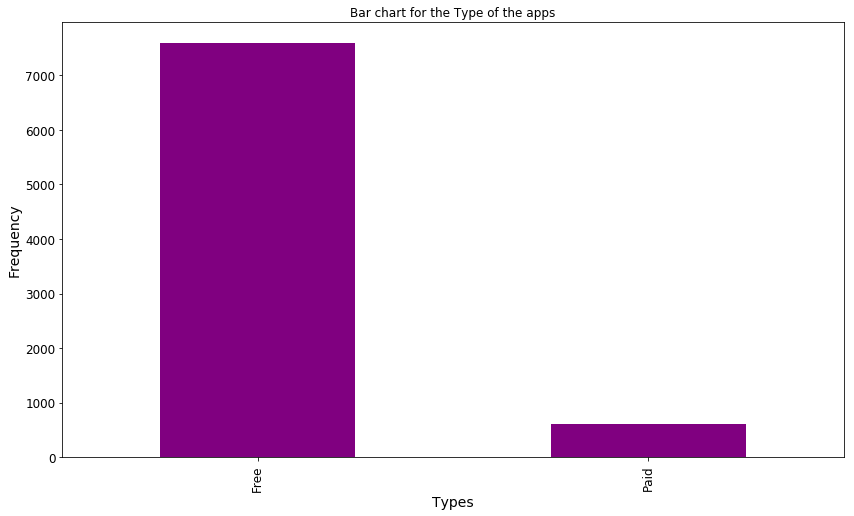

In [14]:
ax = data['Type'].value_counts().plot(kind='bar', color = 'purple', 
                                    figsize=(14,8),
                                    title="Bar chart for the Type of the apps")
ax.set_xlabel("Types", fontsize = 14)
ax.set_ylabel("Frequency", fontsize = 14)
plt.tick_params(labelsize=12)

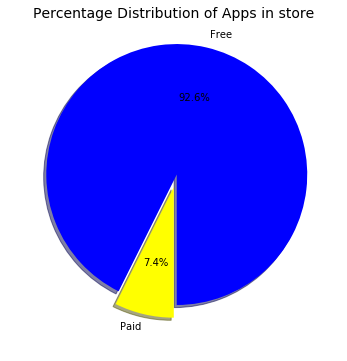

In [15]:
labels =data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)

colors = ["blue", "yellow"]
explode = (0.1, 0)  # explode 1st slice
 
rcParams['figure.figsize'] = 6, 6
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.rcParams['font.size'] = 12

plt.title('Percentage Distribution of Apps in store',size = 14)
plt.show()

From the above given bar graph, it is clear that the apps that can be downloaded free of cost completely dominate the Google appstore.

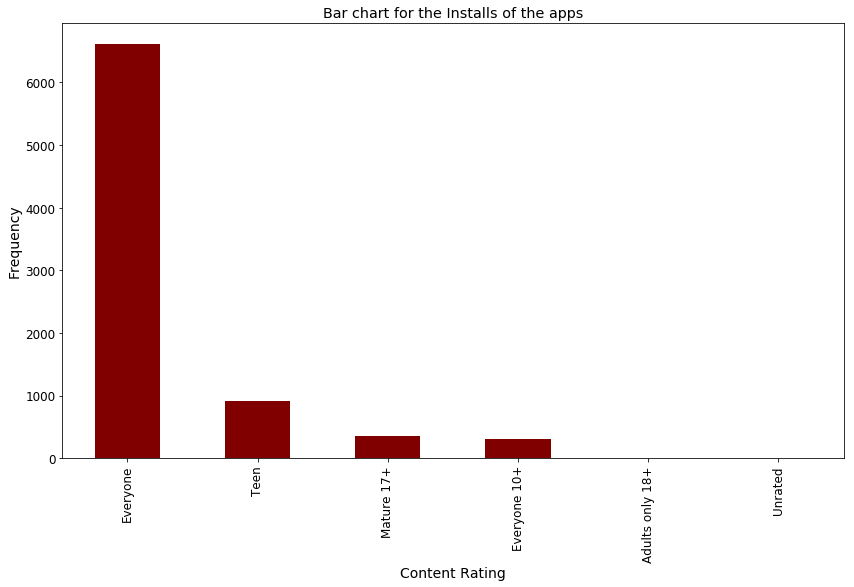

In [16]:
ax = data['Content Rating'].value_counts().plot(kind='bar', color ='maroon',
                                    figsize=(14,8),
                                    title="Bar chart for the Installs of the apps")
ax.set_xlabel("Content Rating", fontsize = 14)
ax.set_ylabel("Frequency", fontsize = 14)
plt.tick_params(labelsize=12)

This graph shows that a large number of apps in the Google Appstore contain the content that is considered suitable for 'Everyone' followed by the apps with content that suit the age group 'Teen' at minimum.

In [ ]:
#ax = data['Genres'].value_counts().plot(kind='bar',
#                                    figsize=(25, 8),
#                                    title="Bar chart for the Genre of the apps")
#ax.set_xlabel("Genres")
#ax.set_ylabel("Frequency")

# Hmm ! What to do with the 'Genre' column ?

In [57]:
# How about adding a small para on Pearson correlation coefficient ?

Next, we look at the correlation between various columns of the Google appstore dataset.
Pearson Correlation coefficient gives us a number that tells how much correlated or uncorrelated two attributes are.

Since most of the atrributes are non-numeric. We need to convert them to numeric attributes in order to calculate the Pearson coefficient.

In [17]:
data.apply(lambda x: x.factorize()[0]).corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('bwr'), axis=1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,1.0,0.26,0.17,0.5,0.16,0.11,0.049,0.053,-0.068,0.14,0.39,0.26,0.019
Category,0.26,1.0,-0.006,0.29,0.05,0.015,0.047,0.037,-0.088,0.85,0.1,0.14,0.048
Rating,0.17,-0.006,1.0,-0.13,0.026,0.21,0.017,0.028,-0.048,-0.022,0.097,0.016,0.018
Reviews,0.5,0.29,-0.13,1.0,0.055,-0.29,-0.02,-0.024,0.051,0.2,0.13,0.25,0.025
Size,0.16,0.05,0.026,0.055,1.0,0.017,0.075,0.047,-0.017,0.024,0.22,0.072,0.067
Installs,0.11,0.015,0.21,-0.29,0.017,1.0,0.13,0.12,-0.043,0.011,0.046,-0.026,0.0072
Type,0.049,0.047,0.017,-0.02,0.075,0.13,1.0,0.67,-0.025,0.055,0.13,-0.0044,0.078
Price,0.053,0.037,0.028,-0.024,0.047,0.12,0.67,1.0,-0.033,0.039,0.1,-0.007,0.07
Content Rating,-0.068,-0.088,-0.048,0.051,-0.017,-0.043,-0.025,-0.033,1.0,-0.091,-0.069,-0.017,-0.046
Genres,0.14,0.85,-0.022,0.2,0.024,0.011,0.055,0.039,-0.091,1.0,0.054,0.11,0.063


One could have easily guessed that there is a high correlation between 'Genre' and 'Category'. The table shows the Pearson correlation coefficient of 0.85 between the two.
One more notable pair of columns is (Type, Price). Since 'Type' here means whether an app is 'Free' or 'Priced', having its positive correlation with 'Price' column in understandable.

In [18]:
#Lets first see which kind of apps really do not get to be rated at all?
#skipping this question 

In [19]:
# FACTORS AFFECTING THE INSTALLATION OF AN APP:

In [0]:
# First we need to convert the column of installs (number of installs) into numeric since counts
# cannot be numeric

#data.Installs = data.Installs.str.replace('+','').str.replace(',','').astype(int)

# if the dataset is loaded again, run this once.

What are the factors affecting the installation of an app?

Let's take a look at the "Installs" column first.

In [20]:
print(data['Installs'])

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
5            50,000+
6            50,000+
7         1,000,000+
8         1,000,000+
9            10,000+
10        1,000,000+
11        1,000,000+
12       10,000,000+
13          100,000+
14          100,000+
16          500,000+
17           10,000+
18        5,000,000+
19       10,000,000+
20          100,000+
21          100,000+
22          500,000+
24           50,000+
25           10,000+
26          500,000+
27          100,000+
28           10,000+
29          100,000+
30          100,000+
31           50,000+
            ...     
10795       100,000+
10796     1,000,000+
10797     1,000,000+
10799       100,000+
10800         5,000+
10801         1,000+
10802        10,000+
10803     1,000,000+
10804       100,000+
10805           100+
10809     1,000,000+
10810           100+
10812         1,000+
10814        50,000+
10815       500,000+
10817       100,000+
10819        

The 'Installs' column needs to be converted into integer type for which we will first remove the , and + signs from the values.

In [21]:
data.Installs = data.Installs.str.replace('+','').str.replace(',','').astype(int)

In [22]:
print(data['Installs'])

0           10000
1          500000
2         5000000
3        50000000
4          100000
5           50000
6           50000
7         1000000
8         1000000
9           10000
10        1000000
11        1000000
12       10000000
13         100000
14         100000
16         500000
17          10000
18        5000000
19       10000000
20         100000
21         100000
22         500000
24          50000
25          10000
26         500000
27         100000
28          10000
29         100000
30         100000
31          50000
           ...   
10795      100000
10796     1000000
10797     1000000
10799      100000
10800        5000
10801        1000
10802       10000
10803     1000000
10804      100000
10805         100
10809     1000000
10810         100
10812        1000
10814       50000
10815      500000
10817      100000
10819        5000
10820        1000
10826     5000000
10827        5000
10828       10000
10829       10000
10830      100000
10832      100000
10833     

The dtype of this column can now seen to be int64.

In [23]:
print(plt.style.available)

['seaborn-pastel', 'seaborn-paper', 'seaborn-white', 'classic', 'fivethirtyeight', 'seaborn-darkgrid', 'seaborn-whitegrid', 'seaborn-muted', 'seaborn-poster', 'Solarize_Light2', 'seaborn-bright', 'seaborn-colorblind', 'ggplot', 'seaborn-dark-palette', 'seaborn-deep', 'seaborn-notebook', 'seaborn-talk', 'dark_background', 'seaborn-dark', 'fast', 'bmh', '_classic_test', 'tableau-colorblind10', 'grayscale', 'seaborn-ticks', 'seaborn']


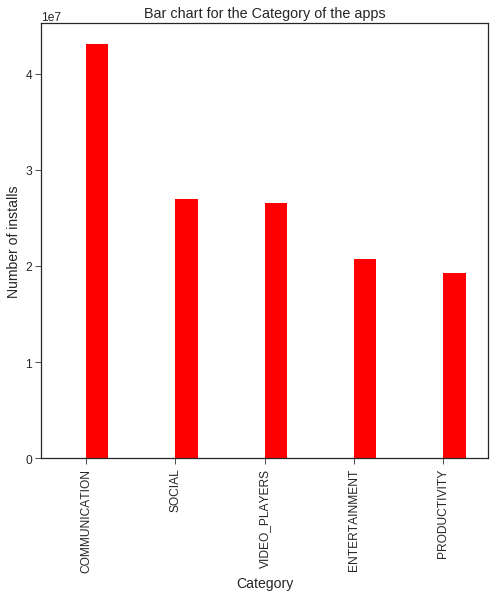

In [24]:

l = len(data["Category"].unique())
plt.style.use('seaborn-ticks')
ax = data.groupby("Category").mean().sort_values(by="Installs", ascending=False)[:5].plot(kind='bar', color = 'red',
                                    legend = False,
                                    figsize=(8, 8),
                                    title="Bar chart for the Category of the apps")

ax.set_xlabel("Category", fontsize = 14)
ax.set_ylabel("Number of installs", fontsize = 14)
plt.tick_params(labelsize=12)

The above given bar graph shows that the top 5 most installed app categories. Clearly, 'Communication' apps get the highest number of installations followed by 'Social' apps and the 'Video Players'.

Here we make a claim:
'An app that serves the soul purpose (communication) of the android devices will naturally get higher number of installations.' <br/>
This is the reason that the apps of category 'Communication' and 'Social' have the highest number of installations.

Next we look how the type of an app can affect its installation.

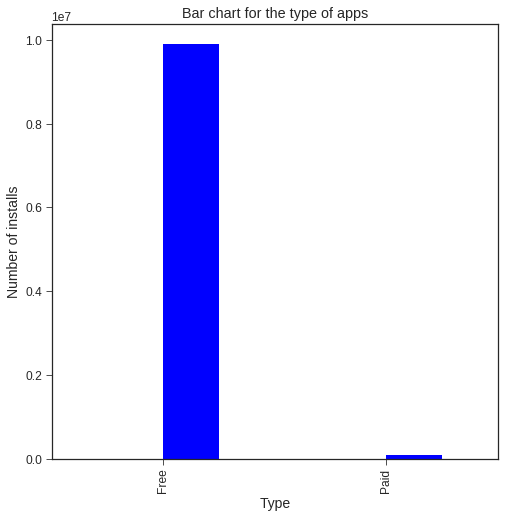

In [26]:

l = len(data["Type"].unique())

ax = data.groupby("Type").mean().sort_values(by="Installs", ascending=False)[:l].plot(kind='bar', color = 'blue',
                                    legend = False,
                                    figsize=(8, 8),
                                    title="Bar chart for the type of apps")

ax.set_xlabel("Type", fontsize = 14)
ax.set_ylabel("Number of installs", fontsize = 14)
plt.tick_params(labelsize=12)

Bar graph shows that free apps get huge number of installations. This is obvious as a very small fraction of people are ever willing to pay for some app they are using in their android device unless it is of an extreme importance to them. 

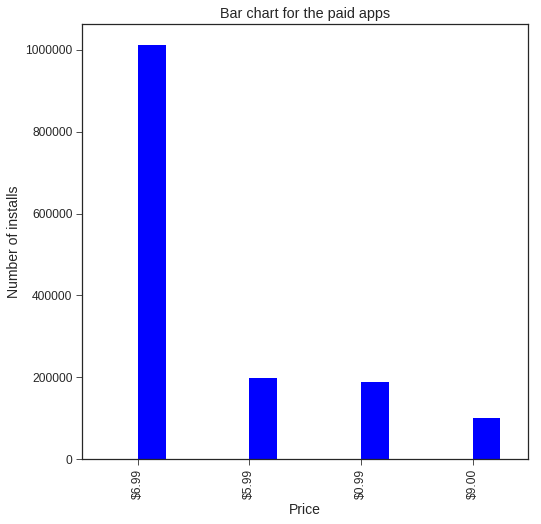

In [28]:
l = len(data["Price"].unique())

ax = data.groupby("Price").mean().sort_values(by="Installs", ascending=False)[1:5].plot(kind='bar', color = 'blue',
                                    legend = False,
                                    figsize=(8, 8),
                                    title="Bar chart for the paid apps")

ax.set_xlabel("Price", fontsize = 14)
ax.set_ylabel("Number of installs", fontsize = 14)
plt.tick_params(labelsize=12)

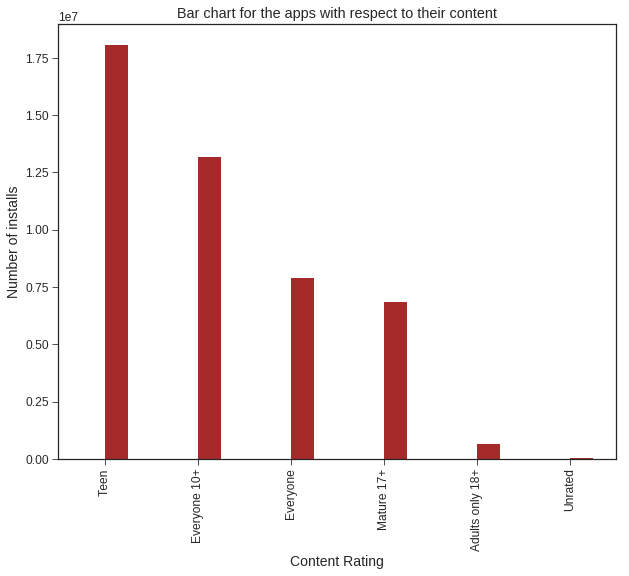

In [29]:
l = len(data["Content Rating"].unique())

ax = data.groupby("Content Rating").mean().sort_values(by="Installs", ascending=False)[:l].plot(kind='bar',
                                    color = 'brown',
                                    legend = False,
                                    figsize=(10, 8),
                                    title="Bar chart for the apps with respect to their content")
ax.set_xlabel("Content Rating", fontsize = 14)
ax.set_ylabel("Number of installs", fontsize = 14)
plt.tick_params(labelsize=12)

This bar graph shows that the apps with content rating "Teen" have the highest number of installs in the Google appstore. This is a very intersting result. By combining Figure X and Figure Y, we conclude that although a large number of apps in the appstore have the content rating "Everyone", the apps with the content rating "Teens" carry the highest number of installations.
Apps that have the content suitable for adults get very few installtions.

This is counter intuitive . One good reason that I imagine is that a majority of the popular apps that can be seen in almost every android device and used by people of all age groups are not marked suitable for 'Everyone' but officially require the user to be at least 13+ i.e. "Teen". For example, Twitter has content rating of 17+ whereas Instagram, Pinterest have content rating of 13+. <br/>
Below we content rating of the most popular apps in the Google appstore from our dataset: <br/>
Facebook Teen <br/>
Instagram Teen <br/>
Pinterest Teen <br/>
Twitter Mature 17+ <br/>
Whatsapp Messenger Everyone <br/>
Google Playbooks Teens <br/>

Here we further improve our claim made above: <br/>
Any app that serves the purpose of Communication and Social connection is most likely to be installed in a large number of android devices. Further, it is not important for an app to have the content rating of 'Everyone' for it to get higher number of installations. <br/>

In [30]:
data[data.Installs > 10000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,100000000,Free,0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080,Varies with device,100000000,Free,0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730,Varies with device,50000000,Free,0,Everyone,Business,"May 21, 2018",Varies with device,Varies with device


In [31]:
row = data.loc[data['App']=='WhatsApp Messenger'].index
data.loc[row[0], 'Content Rating']

'Everyone'

# Machine Learning <br/>

Here we will predict the rating of an app based on its attribute.

For this, we first need to convert all the attributes/columns to numeric value attributes/columns.

'Rating' is already a numeric column and we have passed it through pre-processing phase to remove NA entries. <br/>
Let us look at the Current Ver column of the dataset.

In [47]:
print (data['Current Ver'].unique())

['1.0.0' '2.0.0' '1.2.4' ... '1.5.447' '1.0.612928' '0.3.4']


We need to remove the unicode characters from this column.

In [52]:
replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
    data['Current Ver'] = data['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))

regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
    data['Current Ver'] = data['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

data['Current Ver'] = data['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)


Then we fill the null entries with the median of the values of this column. <br/>
Why median? Why not mean? <br/>
Median is a superior measure of average than mean. It is not effected by the outliers.

In [53]:
data['Current Ver'] = data['Current Ver'].fillna(data['Current Ver'].median())

print (data['Current Ver'].unique())

[1.        2.        1.24      ... 1.5447    1.0612928 0.34     ]


We also convert the 'Price' and 'Installs' columns to numeric ones by performing a little bit of cleaning.

In [61]:
# Handling the Price columns
data['Price'] = data['Price'].apply(lambda x : x.strip('$'))

# Installs cealning
data['Installs'] = data['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

Next, we handle the 'Last updated' column.

In [62]:
data['Last Updated'] = data['Last Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple()))

Next we start encoding the non-numeric columns.

In [80]:
# Category features encoding
category_list = data['Category'].unique().tolist() 
category_list = ['cat_' + word for word in category_list]
data = pd.concat([data, pd.get_dummies(data['Category'], prefix='cat')], axis=1)

# App values encoding
le = preprocessing.LabelEncoder()
data['App'] = le.fit_transform(data['App'])

# Content Rating encoding
le = preprocessing.LabelEncoder()
data['Content Rating'] = le.fit_transform(data['Content Rating'])

# Genres features encoding
le = preprocessing.LabelEncoder()
data['Genres'] = le.fit_transform(data['Genres'])

In [81]:
data['Category'].unique()

array(['ART_AND_DESIGN', 0, 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

Do you see the category type 0? It needs to be removed.

In [84]:
i = data[data['Category'] == 0].index
data= data.drop(i)

In [85]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

It has been removed.

In [79]:
# Convert kbytes to Mbytes 
k_indices = data['Size'].loc[data['Size'].str.contains('k')].index.tolist()
converter = pd.DataFrame(data.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
data.loc[k_indices,'Size'] = converter

In [64]:
# Size cleaning
data['Size'] = data['Size'].apply(lambda x: x.strip('M'))
data[data['Size'] == 'Varies with device'] = 0
data['Size'] = data['Size'].astype(float)              

In [70]:
# Type encoding
data['Type'] = pd.get_dummies(data['Type'])

We now move towards the application of the algorithms.

In [71]:
# Split data into training and testing sets
features = ['App', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver']
features.extend(category_list)

#feature matrix
X = data[features]
#label vector
y = data['Rating']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 10840
Columns: 112 entries, App to cat_WEATHER
dtypes: float64(4), int64(103), object(4), uint8(1)
memory usage: 6.0+ MB


We use the K nearest Regression method to predict the rating of the apps based on the features' vector

In [99]:
model = KNeighborsRegressor(n_neighbors = 10)

In [100]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

Our K-Nearest Neighbor Regressor model is trained on the training dataset.

In [101]:
accuracy = model.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 3)) + '%'

'Accuracy: 89.021%'

89.021% is a low accuracy. Let's see at what value of K for KNN Regressor do we get the highest accuracy?

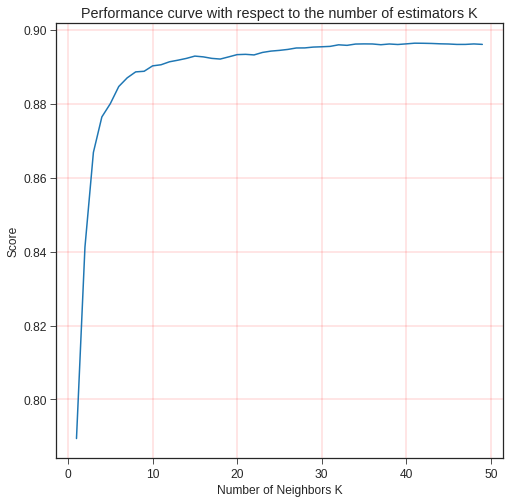

In [107]:
n_neighbors = np.arange(1, 50, 1)
scores = []
for n in n_neighbors:
    model.set_params(n_neighbors=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(8, 8))
plt.title("Performance curve with respect to the number of estimators K")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)
plt.grid(b=None, which='major', axis='both', color='r', linestyle='-', linewidth=0.2)

We don't see much improvement in performance after K=20. And the score remains below 90 even around K=50.

In [112]:
print('Max Performance :'+str(max(scores)*100)+'%')

Max Performance :89.63451264635248%
